## Backpropagation Exercise
In this exercise we will use backpropagation to train a multi-layer perceptron (with a single hidden layer).  We will experiment with different patterns and see how quickly or slowly the weights converge.  We will see the impact and interplay of different parameters such as learning rate, number of iterations, and number of data points.

In [1]:
#Preliminaries
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Fill out the code below so that it creates a multi-layer perceptron with a single hidden layer (with 4 nodes) and trains it via back-propagation.  Specifically your code should:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time


Once your code is running, try it for the different patterns below.

- Which patterns was the neural network able to learn quickly and which took longer?
- What learning rates and numbers of iterations worked well?
- If you have time, try varying the size of the hidden layer and experiment with different activation functions (e.g. ReLu)

In [521]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

num_obs = 500  # 500
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1, x_mat_bias), axis=1)

# PICK ONE PATTERN BELOW and comment out the rest.

# Circle pattern
y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
# y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
# y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)


print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

shape of x_mat_full is (500, 3)
shape of y is (500,)


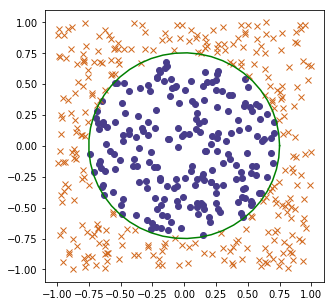

In [522]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_1[y==1, 0], x_mat_1[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_1[y==0, 0], x_mat_1[y==0, 1], 'bx', label='class 0', color='chocolate')

# Circle pattern
phi = np.linspace(0, 2 * np.pi, 50)
r = 0.75
ax.plot(r * np.cos(phi), r * np.sin(phi), 'g')

# # Diamond Pattern
# r = 1
# ax.plot(r * np.array([-1, 0, 1, 0, -1]), r * np.array([0, 1, 0, -1, 0]), 'g')

# # Centered square
# r = 0.5
# ax.plot(r * np.array([-1, 1, 1, -1, -1]), r * np.array([1, 1, -1, -1, 1]), 'g')

# # Thick Right Angle pattern
# ax.plot(np.array([-1, -1, 0.5, 0.5, -0.5, -0.5, -1]), np.array([-0.5, 0.5, 0.5, -1, -1, -0.5, -0.5]), 'g')

# # Thin right angle pattern
# ax.plot(np.array([-1, -1, 0.5, 0.5, 0, 0, -1]), np.array([0, 0.5, 0.5, -1, -1, 0, 0]), 'g')

plt.show()

Here are some helper functions

In [523]:
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-x))

def relu(x):
    return x * (x > 0)

def d_relu(x):
    return (np.sign(x) + 1) / 2

def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)


def forward_pass(W_1, W_2):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` (global variable) and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    global x_mat
    global y
    global num_obs
    # First, compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W_1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2, W_2)
    y_pred = sigmoid(z_3).reshape((len(x_mat),))
    # Now compute the gradient
    J_z_3_grad = -y + y_pred
    J_W_2_grad = np.dot(J_z_3_grad, a_2)
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)
    
    # return
    return y_pred, gradient


def forward_pass2(W_1, W_2):
    """
    My version of the above
    """
    global x_mat
    global y
    global num_obs
    
    # First, compute the new predictions `y_pred`
    z_2 = x_mat @ W_1
    a_2 = np.concatenate( (sigmoid(z_2), np.ones((num_obs, 1))), axis=1 )
    z_3 = a_2 @ W_2
    y_pred = sigmoid(z_3).reshape(-1)
    
    # Now compute the gradient
    J_z_3_grad = (-y + y_pred)[:, np.newaxis]
    J_W_2_grad = np.sum(a_2[:,:,np.newaxis] * J_z_3_grad[:,np.newaxis,:], axis=0)
    J_a_2_grad = np.sum(W_2[np.newaxis,:-1,:] * J_z_3_grad[:,np.newaxis,:], axis=-1)
    J_W_1_grad = np.sum(x_mat[:,:,np.newaxis] * (sigmoid(z_2)*(1-sigmoid(z_2)))[:,np.newaxis,:] * J_a_2_grad[:,np.newaxis,:], axis=0)
    gradient = (J_W_1_grad, J_W_2_grad)

    return y_pred, gradient


def forward_pass3(W_1, W_2):
    """
    Same as the above but for the relu in place of the sigmoid
    """
    global x_mat
    global y
    global num_obs
    
    # First, compute the new predictions `y_pred`
    z_2 = x_mat @ W_1
    a_2 = np.concatenate( (relu(z_2), np.ones((num_obs, 1))), axis=1 )
    z_3 = a_2 @ W_2
    y_pred = sigmoid(z_3).reshape(-1)
    
    # Now compute the gradient
    J_z_3_grad = (-y + y_pred)[:, np.newaxis]
    J_W_2_grad = np.sum(a_2[:,:,np.newaxis] * J_z_3_grad[:,np.newaxis,:], axis=0)
    J_a_2_grad = np.sum(W_2[np.newaxis,:-1,:] * J_z_3_grad[:,np.newaxis,:], axis=-1)
    J_W_1_grad = np.sum(x_mat[:,:,np.newaxis] * (d_relu(z_2))[:,np.newaxis,:] * J_a_2_grad[:,np.newaxis,:], axis=0)
    gradient = (J_W_1_grad, J_W_2_grad)

    return y_pred, gradient


def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')
    
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

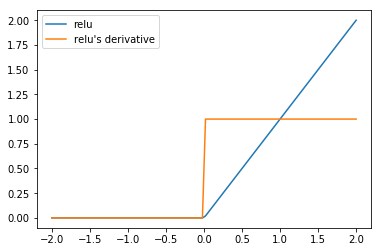

In [489]:
xxx = np.linspace(-2, 2, 100)
plt.plot(xxx, relu(xxx), label='relu')
plt.plot(xxx, d_relu(xxx), label="relu's derivative")
plt.legend()
plt.show()

Complete the pseudocode below

In [536]:
hidden_nodes = 4 # 4
num_iter = 2000
learning_rate = 1 * 1e-3
x_mat = x_mat_full

0.7268929821974184 0.578
0.24177687516758273 0.938
0.1407100713455145 0.968
0.10594359503582072 0.972
0.08965076579496756 0.97
0.07965293533021287 0.972
0.07265596023231663 0.976
0.06786553687597381 0.974
0.06428164480084067 0.974
0.06146944479546626 0.976


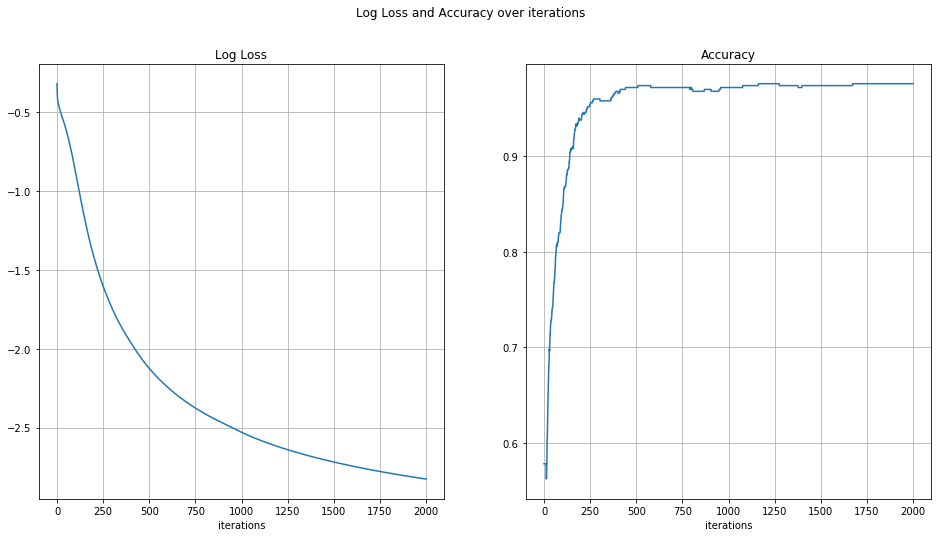

In [537]:
# Using my own forward-pass function (relu)

#### Initialize the network parameters

np.random.seed(1241)

W_13 = np.random.uniform(-1,1, size = (3, hidden_nodes))
W_23 = np.random.uniform(-1,1, size = (W_13.shape[1] + 1, 1))


loss_vals3, accuracies3 = [], []
for i in range(num_iter):
    ### Do a forward computation, and get the gradient
    y_pred, gradient = forward_pass3(W_13, W_23)
    
    ## Update the weight matrices
    W_13 += - learning_rate * gradient[0]
    W_23 += - learning_rate * gradient[1]
    
    ### Compute the loss and accuracy
    loss_val = loss_fn(y, y_pred)
    loss_vals3.append(loss_val)
    accuracy = np.mean(y == np.round(y_pred))
    accuracies3.append(accuracy)

    ## Print the loss and accuracy for every 200th iteration
    if i % 200 == 0:
        print(loss_val, accuracy)
    
plot_loss_accuracy(np.log(loss_vals3), accuracies3)

In [538]:
W_23.shape

(5, 1)

In [539]:
W_23

array([[-6.26817443],
       [ 5.21025723],
       [-6.53031959],
       [-6.535548  ],
       [ 1.60266102]])

0.8675423694721521 0.578
0.6751530108089233 0.578
0.6612937285572902 0.57
0.6128457331870996 0.654
0.544184956498483 0.728
0.5041270741286741 0.746
0.43553279471543827 0.826
0.3320810869915227 0.9
0.2757312010208812 0.926
0.24820738055894495 0.926


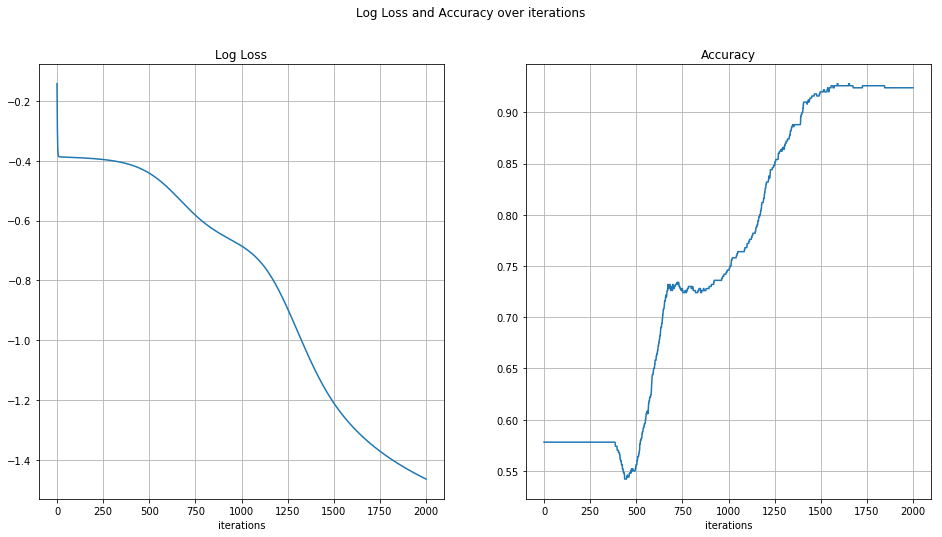

In [540]:
# Using my own forward-pass function

#### Initialize the network parameters

np.random.seed(1241)

W_12 = np.random.uniform(-1,1, size = (3, hidden_nodes))
W_22 = np.random.uniform(-1,1, size = (W_12.shape[1] + 1, 1))
x_mat = x_mat_full


loss_vals2, accuracies2 = [], []
for i in range(num_iter):
    ### Do a forward computation, and get the gradient
    y_pred, gradient = forward_pass2(W_12, W_22)
    
    ## Update the weight matrices
    W_12 += - learning_rate * gradient[0]
    W_22 += - learning_rate * gradient[1]
    
    ### Compute the loss and accuracy
    loss_val = loss_fn(y, y_pred)
    loss_vals2.append(loss_val)
    accuracy = np.mean(y == np.round(y_pred))
    accuracies2.append(accuracy)

    ## Print the loss and accuracy for every 200th iteration
    if i % 200 == 0:
        print(loss_val, accuracy)
    
plot_loss_accuracy(np.log(loss_vals2), accuracies2)

In [541]:
W_22.shape

(5, 1)

In [542]:
W_22

array([[-8.2426637 ],
       [ 7.87244234],
       [-1.252436  ],
       [-7.91503136],
       [-1.84516705]])

In [543]:
(W_22 - W_23)/W_22

array([[ 0.23954505],
       [ 0.33816508],
       [-4.21409443],
       [ 0.17428653],
       [ 1.86857232]])

0.7331225071004432 0.578
0.6459887293867366 0.564
0.5033976994831072 0.748
0.29501461210192403 0.936


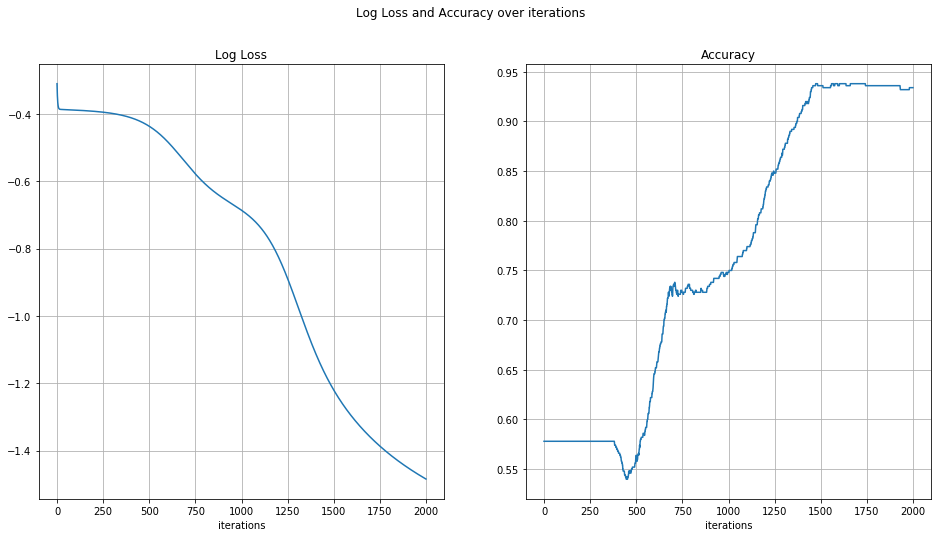

In [544]:
# Using the proposed snippet, which, I believe, does not employ the so called 'bias' after the level of the 'hidden' layer

#### Initialize the network parameters

np.random.seed(1241)

W_1 = np.random.uniform(-1,1, size = (3, hidden_nodes))
W_2 = np.random.uniform(-1,1, size = (W_1.shape[1],))
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    ### Do a forward computation, and get the gradient
    y_pred, gradient = forward_pass(W_1, W_2)
    
    ## Update the weight matrices
    W_1 += - learning_rate * gradient[0]
    W_2 += - learning_rate * gradient[1]
    
    ### Compute the loss and accuracy
    loss_val = loss_fn(y, y_pred)
    loss_vals.append(loss_val)
    accuracy = np.mean(y == np.round(y_pred))
    accuracies.append(accuracy)

    ## Print the loss and accuracy for every 200th iteration
    if i % 500 == 0:
        print(loss_val, accuracy)
    
plot_loss_accuracy(np.log(loss_vals), accuracies)

In [545]:
W_2.shape

(4,)

In [546]:
W_2.reshape(-1,1)

array([[-8.39653787],
       [ 7.53712152],
       [-3.04739167],
       [-8.13227007]])

In [547]:
(W_22[:-1] - W_2.reshape(-1,1)) / W_22[:-1]

array([[-0.01866802],
       [ 0.04259425],
       [-1.43317156],
       [-0.02744635]])

In [548]:
### The trained neural net as a function

In [549]:
def net(x):
    x1 = np.concatenate( (np.array(x), [1]) )
    x2 = sigmoid(x1 @ W_1)
    y = sigmoid(x2 @ W_2)
    return y

In [550]:
def net2(x):
    x1 = np.concatenate( (np.array(x), [1]) )
    x2 = sigmoid(x1 @ W_12)
    x2 = np.concatenate( (x2, [1]) )
    y = sigmoid(x2 @ W_22)
    return y[0]

In [551]:
def net3(x):
    x1 = np.concatenate( (np.array(x), [1]) )
    x2 = relu(x1 @ W_13)
    x2 = np.concatenate( (x2, [1]) )
    y = sigmoid(x2 @ W_23)
    return y[0]

In [552]:
#### Plot the predicted answers with mistakes in yellow

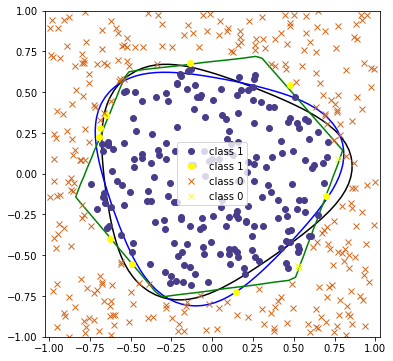

In [553]:
x_i = np.linspace(-1, 1, 50)
y_i = np.linspace(-1, 1, 50)

y_pred = np.array([np.round(net([x_, y_])) for (x_, y_) in x_mat_1])
y_pred2 = np.array([np.round(net2([x_, y_])) for (x_, y_) in x_mat_1])
y_pred3 = np.array([np.round(net3([x_, y_])) for (x_, y_) in x_mat_1])

z_i = np.array([net([x_, y_]) for y_ in y_i for x_ in x_i]).reshape((len(x_i), len(y_i)))
z_i2 = np.array([net2([x_, y_]) for y_ in y_i for x_ in x_i]).reshape((len(x_i), len(y_i)))
z_i3 = np.array([net3([x_, y_]) for y_ in y_i for x_ in x_i]).reshape((len(x_i), len(y_i)))
x_mesh, y_mesh = np.meshgrid(x_i, y_i)

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(x_mat_1[(y==1) & (y_pred3==1), 0], x_mat_1[(y==1) & (y_pred3==1), 1], 'o', label='class 1', color='darkslateblue')
ax.plot(x_mat_1[(y==1) & (y_pred3==0), 0], x_mat_1[(y==1) & (y_pred3==0), 1], 'o', label='class 1', color='yellow')
ax.plot(x_mat_1[(y==0) & (y_pred3==0), 0], x_mat_1[(y==0) & (y_pred3==0), 1], 'x', label='class 0', color='chocolate')
ax.plot(x_mat_1[(y==0) & (y_pred3==1), 0], x_mat_1[(y==0) & (y_pred3==1), 1], 'x', label='class 0', color='yellow')

ax.legend(loc='best')
ax.axis('equal');
ax.contour(x_mesh, y_mesh, z_i, [0.5], colors=['black'])
ax.contour(x_mesh, y_mesh, z_i2, [0.5], colors=['blue'])
ax.contour(x_mesh, y_mesh, z_i3, [0.5], colors=['green'])
plt.show()